
--- Average Income Utilization % by AGE_GROUP ---
| age_group   | Utilization %   |
|:------------|:----------------|
| 21-24       | 243.04%         |
| 25-34       | 262.73%         |
| 35-45       | 279.66%         |
| 45+         | 210.48%         |


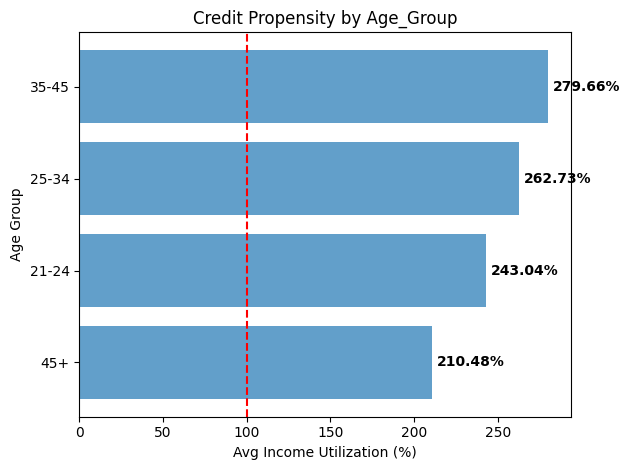


--- Average Income Utilization % by OCCUPATION ---
| occupation               | Utilization %   |
|:-------------------------|:----------------|
| Business Owners          | 199.44%         |
| Freelancers              | 274.48%         |
| Government Employees     | 173.78%         |
| Salaried IT Employees    | 305.56%         |
| Salaried Other Employees | 252.16%         |


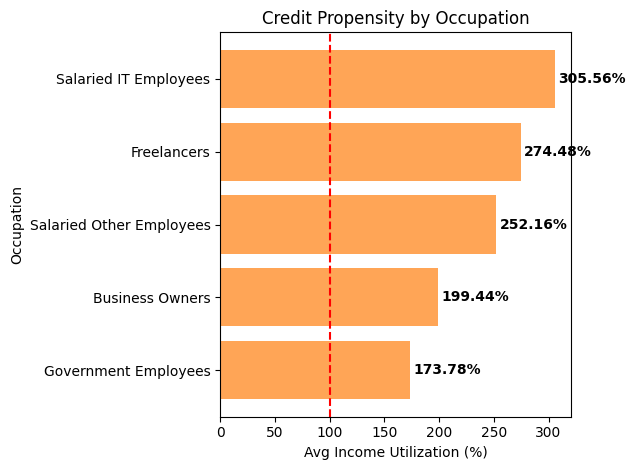


Insight: Segments with >100% utilization indicate high reliance on credit.


In [3]:
#2.
import pandas as pd, matplotlib.pyplot as plt

def plot_util(df, group, color):
    df['val'] = df['Utilization %'].str.replace('%', '').astype(float)
    df = df.sort_values('val')
    plt.barh(df[group], df['val'], color=color, alpha=0.7)
    for i, v in enumerate(df['val']):
        plt.text(v + 3, i, f'{v:.2f}%', va='center', fontsize=10, fontweight='bold')
    plt.axvline(100, color='r', ls='--', lw=1.5)
    plt.xlabel('Avg Income Utilization (%)'); plt.ylabel(group.replace('_',' ').title())
    plt.title(f'Credit Propensity by {group.title()}')
    plt.tight_layout(); plt.show()

def analyze(df, group, color):
    out = df.groupby(group)['util'].mean().mul(100).round(2).reset_index(name='Utilization %')
    out['Utilization %'] = out['Utilization %'].astype(str) + '%'
    print(f"\n--- Average Income Utilization % by {group.upper()} ---")
    print(out.to_markdown(index=False))
    plot_util(out, group, color)

def main():
    c, s = pd.read_csv('dim_customers.csv'), pd.read_csv('fact_spends.csv')
    df = s.groupby('customer_id')['spend'].sum().reset_index().merge(
        c[['customer_id', 'avg_income', 'age_group', 'occupation']], on='customer_id')
    df = df[df['avg_income'] > 0]; df['util'] = df['spend'] / df['avg_income']
    for col, colr in zip(['age_group', 'occupation'], ['#1f77b4', '#ff7f0e']):
        analyze(df, col, colr)
    print("\nInsight: Segments with >100% utilization indicate high reliance on credit.")

if __name__ == '__main__': main()